In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('Breast_Cancer_dataset.csv')

In [3]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [5]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [6]:
#no missing values
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
data.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

In [8]:
#Columns
numericalFeats = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
categoricalFeats = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status']
target = ['Status']

In [9]:
#Categorical to numerical

dataOHE = pd.get_dummies(data[categoricalFeats], drop_first=True)


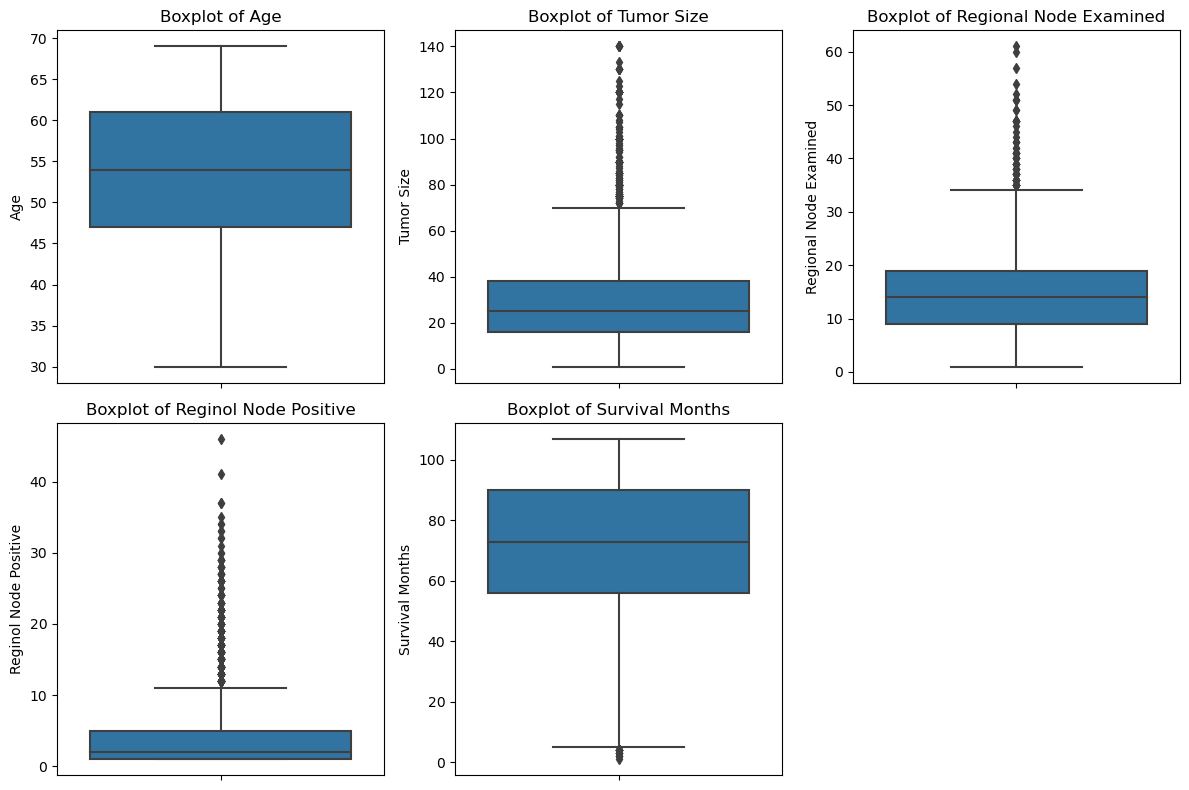

In [10]:
#Outlier detection and removal
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting boxplots for numerical columns to visualize outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericalFeats):
    plt.subplot(len(numericalFeats) // 3 + 1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

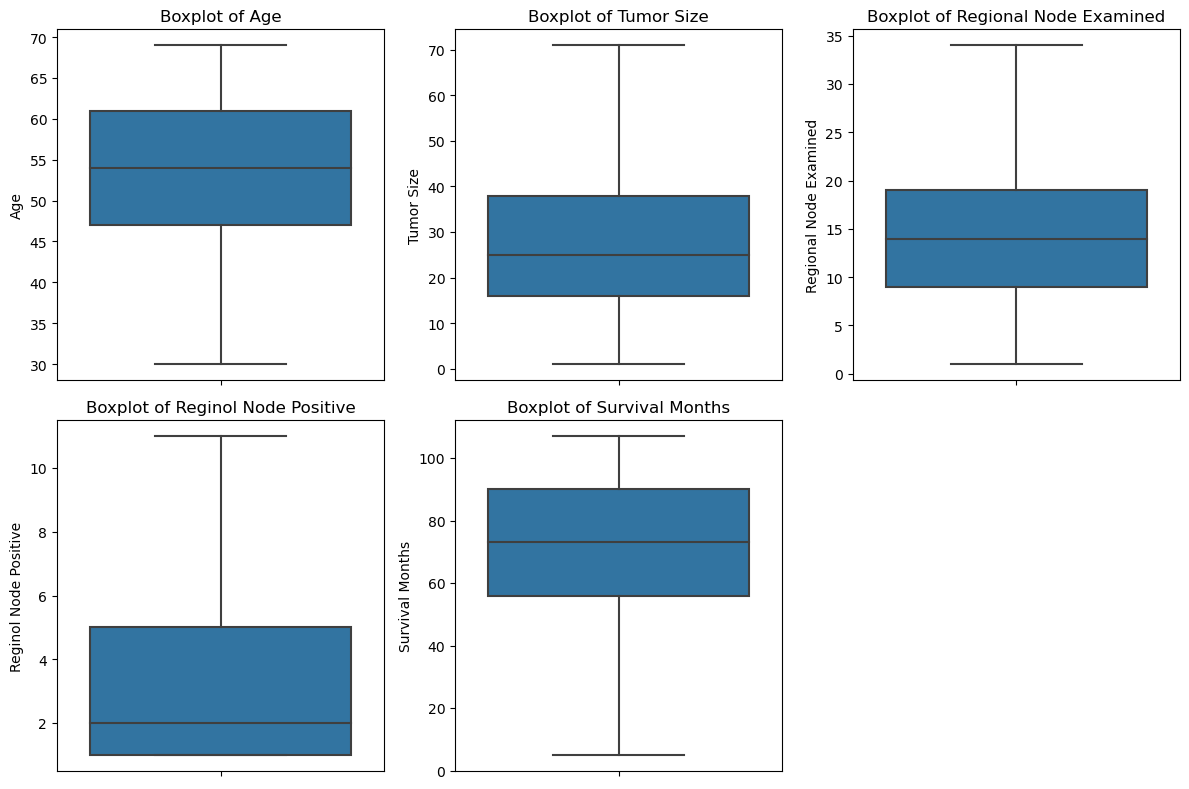

In [11]:
from scipy.stats import iqr

# Capping outliers based on the IQR method
for col in numericalFeats:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Recheck the boxplots after capping outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericalFeats):
    plt.subplot(len(numericalFeats) // 3 + 1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [12]:
#Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Standardization
# scaler = StandardScaler()
# dataSTD = pd.DataFrame(scaler.fit_transform(data[numericalFeats]), columns=numericalFeats)

# Normalization
minmaxScaler = MinMaxScaler()
dataNRM = pd.DataFrame(minmaxScaler.fit_transform(data[numericalFeats]), columns=numericalFeats)

#dataSTD.head()
dataNRM.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.974359,0.042857,0.696970,0.0,0.539216
1,0.512821,0.485714,0.393939,0.4,0.558824
2,0.717949,0.885714,0.393939,0.6,0.686275
3,0.717949,0.242857,0.030303,0.0,0.774510
4,0.435897,0.571429,0.060606,0.0,0.441176


In [13]:
#Dimensionality reduction by PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)  # keep 99% of variance
dataPCA = pca.fit_transform(dataNRM)

# Transform PCA output back to DataFrame for better readability
pcaCols = ['PC'+str(i) for i in range(dataPCA.shape[1])]
dataPCA = pd.DataFrame(dataPCA, columns=pcaCols)

# Display PCA result
dataPCA.head(), pca.explained_variance_ratio_


(        PC0       PC1       PC2       PC3       PC4
 0 -0.245552 -0.472466  0.062272  0.088060  0.362342
 1  0.164204  0.092284  0.011425  0.086159 -0.052292
 2  0.460003  0.202884  0.181154 -0.273161 -0.026359
 3 -0.425271 -0.036346  0.112068 -0.104157 -0.223856
 4 -0.242787  0.389136  0.207452  0.144234 -0.103814,
 array([0.39885973, 0.17622217, 0.15888161, 0.14503157, 0.12100492]))

In [14]:
#Combine categorical and numerical features
dataFinal = pd.concat([dataPCA, dataOHE.astype(int), pd.get_dummies(data['Status'], drop_first=True).astype(int).rename(columns={'Dead': 'Status'})], axis=1)
dataFinal

,PC0,PC1,PC2,PC3,PC4,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,-0.245552,-0.472466,0.062272,0.088060,0.362342,0,1,1,0,0,...,1,0,0,0,0,1,1,1,1,0
1,0.164204,0.092284,0.011425,0.086159,-0.052292,0,1,1,0,0,...,0,0,0,0,1,0,1,1,1,0
2,0.460003,0.202884,0.181154,-0.273161,-0.026359,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
3,-0.425271,-0.036346,0.112068,-0.104157,-0.223856,0,1,1,0,0,...,1,0,0,0,0,1,1,1,1,0
4,-0.242787,0.389136,0.207452,0.144234,-0.103814,0,1,1,0,0,...,1,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,-0.440670,-0.153670,0.348714,0.168030,-0.183572,1,0,1,0,0,...,0,0,0,0,1,0,1,1,1,0
4020,0.465043,0.036274,0.109244,-0.097033,-0.131683,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0
4021,-0.127219,-0.247691,0.253114,-0.109981,0.003275,0,1,1,0,0,...,0,0,0,0,1,0,1,1,0,0
4022,-0.179385,0.178527,0.170228,-0.155559,0.113079,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0


In [15]:
#Fit models

In [16]:
from sklearn.model_selection import train_test_split

X = dataFinal.iloc[:, :-1]
y = dataFinal.iloc[:,-1]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [18]:
#KNN (scratch)
from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, xTrain, yTrain):
        self.xTrain = xTrain.to_numpy()
        self.yTrain = yTrain.to_numpy()
        
    def predict(self, xTest):
        yPred = []
        xTest = xTest.to_numpy()
        for x in xTest:
            euclideanDist = np.linalg.norm(self.xTrain - x, axis=1)
                
            #k nearest neighbors
            nearestIndices = np.argsort(euclideanDist)[:self.k]
            nearestLabels = self.yTrain[nearestIndices]
            
            # Voting
            label = Counter(nearestLabels).most_common(1)[0][0]
            yPred.append(label)
        
        return np.array(yPred)
    


In [19]:
#Predict all
classifiers = {
    'KNN': KNN(k = 5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Training and predicting with each classifier
accuracies = {}
aucroc = {}
for model, c in classifiers.items():
    c.fit(xTrain, yTrain)
    yPred = c.predict(xTest)
    accuracies[model] = round(accuracy_score(yTest, yPred),3)
    aucroc[model] = round(roc_auc_score(yTest, yPred), 3)
# Print the accuracies
print(accuracies)
print(aucroc)

{'KNN': 0.863, 'Naive Bayes': 0.819, 'Decision Tree': 0.835, 'Random Forest': 0.89, 'XGBoost': 0.885}
{'KNN': 0.603, 'Naive Bayes': 0.678, 'Decision Tree': 0.696, 'Random Forest': 0.682, 'XGBoost': 0.708}


In [20]:
#Hyperparameter tuning
#Will tune n_estimators and max_depth for RF and n_estimators and learning_rate for XGB
from sklearn.model_selection import GridSearchCV

In [21]:
# Grid Search for Random Forest
rfGridParam = {
    'n_estimators': [i * 50 for i in range(1, 11)],
    'max_depth': [i * 5 for i in range(1, 7)]
}


rfGrid = GridSearchCV(RandomForestClassifier(), rfGridParam, cv=3, scoring='accuracy')
rfGrid.fit(xTrain, yTrain)
bestRFParam = rfGrid.best_estimator_

# Evaluate Random Forest
yPred = bestRFParam.predict(xTest)
rfAcc = accuracy_score(yTest, yPred)
print("Optimal RF Parameters:", rfGrid.best_params_)
print("Final RF Accuracy:", rfAcc)


Optimal RF Parameters: {'max_depth': 25, 'n_estimators': 150}
Final RF Accuracy: 0.8915562913907285


In [22]:
# Grid Search for Random Forest
xgbGridParam = {
    'n_estimators': [i * 50 for i in range(1, 6)],
    'learning_rate': [i * 0.01 for i in range(1, 11)]
}


xgbGrid = GridSearchCV(XGBClassifier(), xgbGridParam, cv=10, scoring='accuracy')
xgbGrid.fit(xTrain, yTrain)
bestXGBParam = xgbGrid.best_estimator_

# Evaluate Random Forest
yPred = bestXGBParam.predict(xTest)
xgbAcc = accuracy_score(yTest, yPred)
print("Optimal XGB Parameters:", xgbGrid.best_params_)
print("Final XGB Accuracy:", xgbAcc)


Optimal XGB Parameters: {'learning_rate': 0.03, 'n_estimators': 150}
Final XGB Accuracy: 0.890728476821192


In [23]:
#Results step

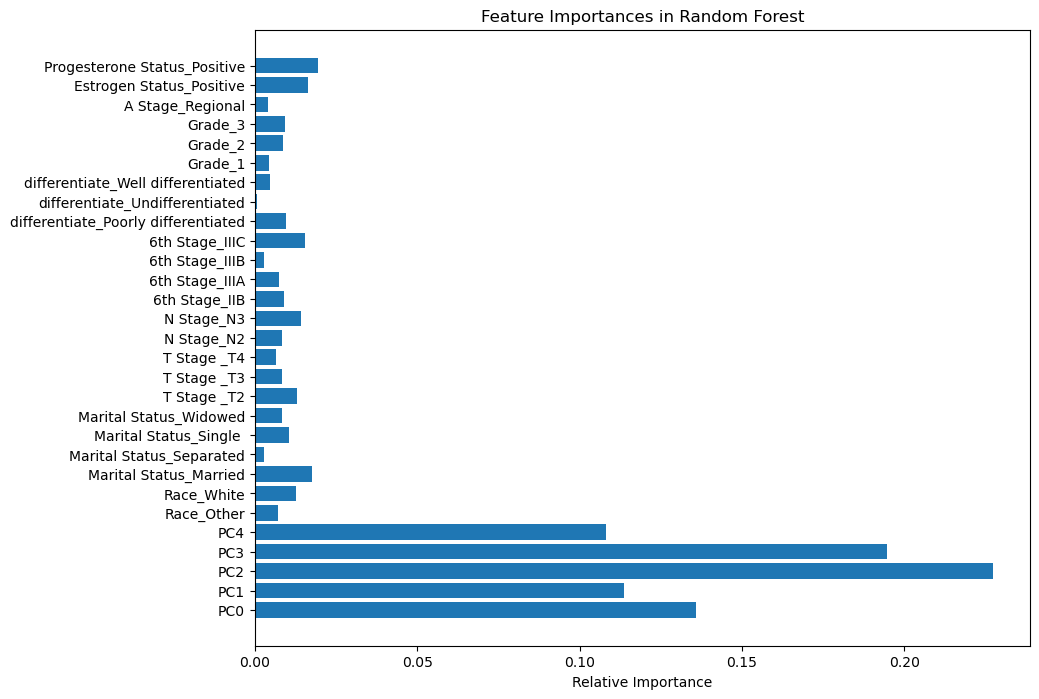

In [24]:
# RF Feature Importance
fImportance = bestRFParam.feature_importances_
plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Random Forest')
plt.barh(range(len(fImportance)), fImportance)
plt.yticks(range(len(fImportance)), X.columns)
plt.xlabel('Relative Importance')
plt.show()

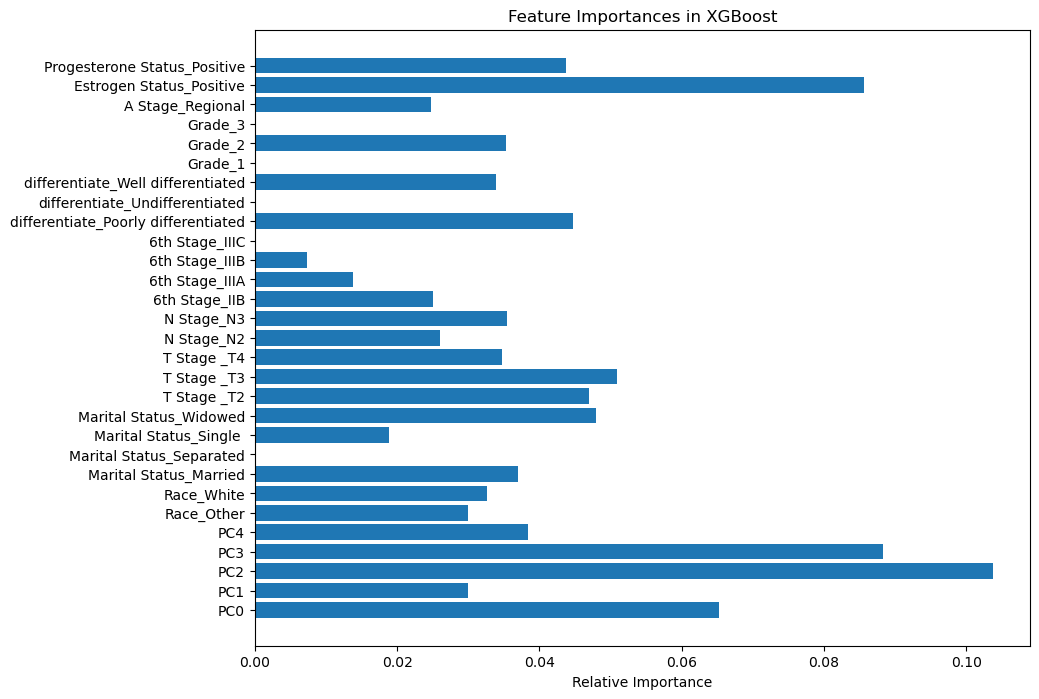

In [25]:
#XGB Feature Importance
fImportance = bestXGBParam.feature_importances_
plt.figure(figsize=(10, 8))
plt.title('Feature Importances in XGBoost')
plt.barh(range(len(fImportance)), fImportance)
plt.yticks(range(len(fImportance)), X.columns)
plt.xlabel('Relative Importance')
plt.show()

In [26]:
pd.DataFrame.from_dict(accuracies, orient= 'index')

,0
KNN,0.863
Naive Bayes,0.819
Decision Tree,0.835
Random Forest,0.890
XGBoost,0.885


In [27]:
pd.DataFrame.from_dict(aucroc, orient= 'index')

,0
KNN,0.603
Naive Bayes,0.678
Decision Tree,0.696
Random Forest,0.682
XGBoost,0.708
